# Project Start Here

In [2]:
import requests as re
import pandas as pd
import numpy as np
import json
import math
from pandas.io.json import json_normalize
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib

## get the data
---
- Get the data by api.
- Save the data as 'raw.csv', which is the raw data ready for data preporcessing.
---
Totaly 2,000 pics of data sorted by time from resent to past.

In [11]:
def get_data():
    zed_index = '?'
    include_sold = '1'
    page_number = 1
    listing_status = 'sale'
    page_size = '100'
    order_by = 'age'
    area = 'somerset'
    api_key = 'hzxt3c3w339feeah3w8knbpu'
    
    save_list = []
    for page_number in range(1, 59):
        url = f"http://api.zoopla.co.uk/api/v1/property_listings.js?zed_index=?&include_sold=1&page_number={page_number}&listing_status=sale&page_size=100&order_by=age&area=somerset&api_key=9dud55d9tr4ptf7umqt4rmf6"
        response = re.get(url)
        json_list = response.json()['listing']
        save_list += json_list
        
    df = json_normalize(save_list)
    df.to_csv('raw.csv')

In [12]:
## Load Raw Data
get_data()

## Read the Data

In [2]:
raw = pd.read_csv('raw.csv')

In [3]:
raw.head()

,Unnamed: 0,agent_address,agent_logo,agent_name,agent_phone,bills_included,category,country,country_code,county,...,price_change,price_change_summary.direction,price_change_summary.last_updated_date,price_change_summary.percent,price_modifier,property_type,short_description,status,street_name,thumbnail_url
0,0,"Norton House, 74-76 High Street, Midsomer Nort...",https://st.zoocdn.com/zoopla_static_agent_logo...,Andrews - Midsomer Norton,01761 231187,NaN,Residential,England,gb,Bath & N E Somerset,...,"[{'direction': '', 'date': '2019-06-18 01:22:5...",NaN,NaN,NaN,NaN,Detached bungalow,This substantial detached residence is situate...,for_sale,Midsomer Norton,https://lid.zoocdn.com/80/60/ee2473a22760dc11d...
1,1,"Nationwide Estate Agent, Head Office: Suite 7,...",https://st.zoocdn.com/zoopla_static_agent_logo...,"Purplebricks, Head Office",024 7511 8874,NaN,Residential,England,gb,North Somerset,...,"[{'direction': '', 'date': '2019-06-17 23:00:1...",NaN,NaN,NaN,NaN,Flat,PurpleBricks are pleased to offer this spaciou...,for_sale,Park Place,https://lid.zoocdn.com/80/60/f8259664d28e259b1...
2,2,"13 Waterloo Street, Weston-Super-Mare",https://st.zoocdn.com/zoopla_static_agent_logo...,Stephen & Co,01934 611064,NaN,Residential,England,gb,North Somerset,...,"[{'direction': '', 'date': '2019-06-17 19:15:5...",NaN,NaN,NaN,NaN,Flat,"<p class=""top"">Located in a central position w...",for_sale,16 Hans Price Close,https://lid.zoocdn.com/80/60/388895031e79ed491...
3,3,"21 East Street, Ilminster",https://st.zoocdn.com/zoopla_static_agent_logo...,Symonds & Sampson - Ilminster,01460 312997,NaN,Residential,England,gb,Somerset,...,"[{'direction': '', 'date': '2019-06-17 13:00:1...",NaN,NaN,NaN,guide_price,Detached house,A quintessential former Grade II listed farmho...,for_sale,Ilminster Somerset,https://lid.zoocdn.com/80/60/c9daa516c454ca556...
4,4,"53 High Street, Taunton",https://st.zoocdn.com/zoopla_static_agent_logo...,Connells - Taunton,01823 429046,NaN,Residential,England,gb,Somerset,...,"[{'direction': '', 'date': '2019-06-17 17:47:5...",NaN,NaN,NaN,NaN,Detached house,This stylish four bedroom detached family home...,for_sale,Harp Chase,https://lid.zoocdn.com/80/60/6eceb0adec59cac58...


### For get data testing
---
Testing the api and csv save method

In [18]:
url = 'http://api.zoopla.co.uk/api/v1/property_listings.js?zed_index=?&include_sold=1&page_number=58&listing_status=sale&page_size=100&order_by=age&area=somerset&api_key=9dud55d9tr4ptf7umqt4rmf6'
response = re.get(url)
df = json_normalize(response.json()['listing'])
df['displayable_address']

AttributeError: module 're' has no attribute 'get'

# Data Preporcessing

In [14]:
raw.columns

Index(['Unnamed: 0', 'agent_address', 'agent_logo', 'agent_name',
       'agent_phone', 'bills_included', 'category', 'country', 'country_code',
       'county', 'description', 'details_url', 'displayable_address',
       'first_published_date', 'floor_area.max_floor_area.units',
       'floor_area.max_floor_area.value', 'floor_area.min_floor_area.units',
       'floor_area.min_floor_area.value', 'floor_plan', 'furnished_state',
       'image_150_113_url', 'image_354_255_url', 'image_50_38_url',
       'image_645_430_url', 'image_80_60_url', 'image_caption', 'image_url',
       'last_published_date', 'latitude', 'letting_fees', 'listing_id',
       'listing_status', 'location_is_approximate', 'longitude', 'new_home',
       'num_bathrooms', 'num_bedrooms', 'num_floors', 'num_recepts', 'outcode',
       'post_town', 'price', 'price_change', 'price_change_summary.direction',
       'price_change_summary.last_updated_date',
       'price_change_summary.percent', 'price_modifier', 'propert

In [15]:
useful_information = raw[['latitude', 'longitude', 'property_type','category', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'street_name', 'new_home', 'price']].reset_index()

In [16]:
def new_home(value):
    if math.isnan(value):
        return 0
    else:
        return 1
    
useful_information['new_home'] = useful_information['new_home'].apply(new_home)

In [17]:
useful_information = useful_information[useful_information.price < 1000000]

In [18]:
useful_information.sort_values(by=['price'])

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
3368,3368,51.025420,-3.138425,Flat,Residential,0,1,0,0,TA2,Taunton,NortonFitzwarren,0,0
32,32,51.312325,-2.830494,Detached house,Residential,0,4,0,0,BS25,Winscombe,NaN,1,0
1062,1062,51.238308,-2.391677,Detached house,Residential,2,4,0,3,BA11,Frome,Somerset,0,0
2222,2222,51.200190,-3.491858,Land,Residential,10,20,0,10,TA24,Minehead,Periton Road,0,0
803,803,51.464540,-2.827770,Mobile/park home,Residential,1,2,0,1,BS21,Clevedon,Seascapes Park,1,0
3572,3572,51.429066,-2.852747,Flat,Residential,0,1,0,0,BS21,Clevedon,Kenn Road,1,0
804,804,51.464540,-2.827770,Mobile/park home,Residential,1,2,0,1,BS21,Clevedon,Seascapes Park,1,0
3571,3571,51.429066,-2.852747,Flat,Residential,0,2,0,0,BS21,Clevedon,Kenn Road,1,0
806,806,51.464540,-2.827770,Mobile/park home,Residential,1,2,0,1,BS21,Clevedon,Seascapes Park,1,0
5363,5363,51.136036,-3.009505,Land,Residential,3,4,0,1,TA6,Bridgwater,Moravia Close,0,0


In [19]:
cate = useful_information.drop_duplicates(['category'])
cate

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
0,0,51.28281,-2.473855,Detached bungalow,Residential,2,3,0,1,BA3,Radstock,Midsomer Norton,0,425000


In [20]:
property_type = useful_information.drop_duplicates(['property_type'])
property_type['property_type']
useful_information[useful_information['property_type'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
19,19,51.275740,-2.770467,NaN,Residential,2,4,0,2,BS27,Cheddar,Masons Way,0,305000
56,56,51.278393,-2.785265,NaN,Residential,1,2,0,1,BS27,Cheddar,Gough Place,0,220000
63,63,51.360540,-2.897348,NaN,Residential,0,2,0,1,BS22,Weston-super-Mare,Willow Gardens St. Georges,0,300000
76,76,51.440758,-2.858619,NaN,Residential,0,3,0,0,BS21,Clevedon,Clevedon,0,395000
86,86,51.093970,-3.016499,NaN,Residential,0,3,0,0,TA6,Bridgwater,North Street,0,325000
101,101,51.061756,-3.108835,NaN,Residential,1,3,0,2,TA2,Taunton,Church Lane,0,450000
115,115,51.208370,-2.649266,NaN,Residential,1,3,0,1,BA5,Wells,Union Street,0,225000
157,157,51.212510,-2.648823,NaN,Residential,1,1,0,1,BA5,Wells,Milton Lane,0,139950
185,185,51.271270,-2.778793,NaN,Residential,2,4,0,2,BS27,Cheddar,Thynne Close,0,390000
190,190,51.280010,-2.276071,NaN,Residential,0,2,0,0,BA11,Frome,Church Farm,1,155000


In [21]:
code = useful_information.drop_duplicates(['outcode'])
code['outcode']
useful_information[useful_information['outcode'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price


In [22]:
post_town = useful_information.drop_duplicates(['post_town'])
useful_information[useful_information['post_town'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
183,183,51.347470,-2.913102,Detached house,Residential,4,5,0,3,BS24,NaN,Mannock Gardens,1,499995
184,184,51.347470,-2.913102,Detached house,Residential,3,5,0,3,BS24,NaN,Mannock Gardens,1,519995
198,198,51.347470,-2.913102,Detached house,Residential,3,5,0,3,BS24,NaN,Mannock Gardens,1,514995
234,234,51.347470,-2.913102,Detached house,Residential,3,4,0,2,BS24,NaN,Mannock Gardens,1,489995
906,906,51.210240,-2.682498,Detached house,Residential,0,3,3,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,339995
1031,1031,51.210240,-2.682498,Detached house,Residential,2,4,2,2,BA5,NaN,"Wookey Hole Road, Wells",1,355000
1225,1225,51.210240,-2.682498,NaN,Residential,0,3,3,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,365995
1295,1295,51.210240,-2.682498,NaN,Residential,0,4,2,3,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,445995
1296,1296,51.210240,-2.682498,NaN,Residential,0,3,2,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,326995
1297,1297,51.210240,-2.682498,NaN,Residential,0,3,2,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,361995


In [23]:
street_name = useful_information.drop_duplicates(['street_name'])
useful_information[useful_information['street_name'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
10,10,51.021255,-2.437421,Cottage,Residential,2,4,0,2,BA8,Templecombe,NaN,0,525000
22,22,50.952847,-2.647563,Terraced house,Residential,1,3,0,1,BA21,Yeovil,NaN,0,170000
32,32,51.312325,-2.830494,Detached house,Residential,0,4,0,0,BS25,Winscombe,NaN,1,0
80,80,50.970795,-2.718610,Semi-detached house,Residential,1,3,0,1,BA22,Yeovil,NaN,0,195000
285,285,50.897453,-2.996088,Detached house,Residential,2,3,0,1,TA20,Chard,NaN,0,400000
370,370,51.353786,-2.982633,Semi-detached house,Residential,0,8,0,0,BS23,Weston-super-Mare,NaN,0,290000
407,407,50.954872,-2.632728,Semi-detached house,Residential,1,3,0,2,BA21,Yeovil,NaN,0,215000
432,432,50.931190,-2.662289,Detached house,Residential,2,4,0,2,BA20,Yeovil,NaN,0,285000
434,434,50.949837,-2.816584,Detached bungalow,Residential,1,3,0,2,TA13,South Petherton,NaN,0,270000
435,435,50.948364,-2.812159,Bungalow,Residential,1,2,0,2,TA13,South Petherton,NaN,0,260000


## KMeans

In [24]:
raw = pd.read_csv('raw.csv')
df_loc = raw[['latitude', 'longitude']]

In [25]:
loc = np.array(df_loc)

k_model = KMeans()
k_model.fit(loc)
y_pred = k_model.predict(loc)

df_loc['class'] = y_pred
df_loc.groupby('class').count()
joblib.dump(k_model, "k_model.m")

C:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


['k_model.m']

In [26]:
raw['loc_class'] = y_pred

In [27]:
raw.head()

,Unnamed: 0,agent_address,agent_logo,agent_name,agent_phone,bills_included,category,country,country_code,county,...,price_change_summary.direction,price_change_summary.last_updated_date,price_change_summary.percent,price_modifier,property_type,short_description,status,street_name,thumbnail_url,loc_class
0,0,"Norton House, 74-76 High Street, Midsomer Nort...",https://st.zoocdn.com/zoopla_static_agent_logo...,Andrews - Midsomer Norton,01761 231187,NaN,Residential,England,gb,Bath & N E Somerset,...,NaN,NaN,NaN,NaN,Detached bungalow,This substantial detached residence is situate...,for_sale,Midsomer Norton,https://lid.zoocdn.com/80/60/ee2473a22760dc11d...,3
1,1,"Nationwide Estate Agent, Head Office: Suite 7,...",https://st.zoocdn.com/zoopla_static_agent_logo...,"Purplebricks, Head Office",024 7511 8874,NaN,Residential,England,gb,North Somerset,...,NaN,NaN,NaN,NaN,Flat,PurpleBricks are pleased to offer this spaciou...,for_sale,Park Place,https://lid.zoocdn.com/80/60/f8259664d28e259b1...,2
2,2,"13 Waterloo Street, Weston-Super-Mare",https://st.zoocdn.com/zoopla_static_agent_logo...,Stephen & Co,01934 611064,NaN,Residential,England,gb,North Somerset,...,NaN,NaN,NaN,NaN,Flat,"<p class=""top"">Located in a central position w...",for_sale,16 Hans Price Close,https://lid.zoocdn.com/80/60/388895031e79ed491...,2
3,3,"21 East Street, Ilminster",https://st.zoocdn.com/zoopla_static_agent_logo...,Symonds & Sampson - Ilminster,01460 312997,NaN,Residential,England,gb,Somerset,...,NaN,NaN,NaN,guide_price,Detached house,A quintessential former Grade II listed farmho...,for_sale,Ilminster Somerset,https://lid.zoocdn.com/80/60/c9daa516c454ca556...,6
4,4,"53 High Street, Taunton",https://st.zoocdn.com/zoopla_static_agent_logo...,Connells - Taunton,01823 429046,NaN,Residential,England,gb,Somerset,...,NaN,NaN,NaN,NaN,Detached house,This stylish four bedroom detached family home...,for_sale,Harp Chase,https://lid.zoocdn.com/80/60/6eceb0adec59cac58...,1


In [28]:
def reset_class(value):
    if value == 0:
        return 'class0'
    elif value == 1:
        return 'class1'
    elif value == 2:
        return 'class2'
    elif value == 3:
        return 'class3'
    elif value == 4:
        return 'class4'
    elif value == 5:
        return 'class5'
    elif value == 6:
        return 'class6'
    elif value == 7:
        return 'class7'

## Naive Bayes
---
Using naive bayes to prodict the nan value

In [29]:
class LabelEncode:
    
    def __init__(self, df_data, col):
        self.le = preprocessing.LabelEncoder()
        col_name = list(df_data.drop_duplicates([col])[col])
        self.le.fit(col_name)

    def encode(self, value):
        return self.le.transform([value])[0]

In [30]:
useful_information = raw[['latitude', 'longitude', 'property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts','outcode','post_town', 'new_home', 'loc_class', 'price']].reset_index()
useful_information['new_home'] = useful_information['new_home'].apply(new_home)

useful_information = useful_information[useful_information.price < 1000000]

pt_le = LabelEncode(useful_information, 'post_town')
encode_col = pt_le.le.transform(list(useful_information['post_town']))
useful_information['post_town'] = encode_col

oc_le = LabelEncode(useful_information, 'outcode')
encode_col = oc_le.le.transform(list(useful_information['outcode']))
useful_information['outcode'] = encode_col

post_le = LabelEncode(useful_information,  'property_type')
encode_col = post_le.le.transform(list(useful_information['property_type']))
useful_information['property_type'] = encode_col

In [31]:
nan_pt = useful_information['property_type'].max()
nan_oc = useful_information['outcode'].max()
nan_post = useful_information['post_town'].max()

In [32]:
nan_pt

28

In [33]:
class naive_bayes:
    def __init__(self, df_data, col, nan_index):
        self.col = col
        self.model = GaussianNB()
        train = df_data[df_data[col] != nan_index]
        train_X = df_data[df_data.columns.difference([col])]
        train_Y = df_data[[col]]
        self.predict_X = df_data[df_data[col] == nan_index]
        self.predict_X = self.predict_X[self.predict_X.columns.difference([col])]  
        self.model.fit(train_X, train_Y)
        
    def predict(self):
        self.result = self.model.predict(self.predict_X)
        self.predict_X[self.col] = self.result
        return self.predict_X

In [34]:
nv_m = naive_bayes(useful_information, 'property_type', nan_pt)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
result = nv_m.predict()
result = result.set_index('index')

In [36]:
useful_information = useful_information.set_index('index')
useful_information.update(result)

In [37]:
useful_information['property_type'].max()

27.0

In [38]:
nv_m = naive_bayes(useful_information, 'outcode', nan_oc)
result = nv_m.predict()
useful_information.update(result)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print(nan_oc)
print(useful_information.outcode.max())

57
56.0


In [40]:
nv_m = naive_bayes(useful_information, 'post_town', nan_post)
result = nv_m.predict()
useful_information.update(result)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(nan_post)
print(useful_information.post_town.max())

45
44.0


In [42]:
useful_information.sample(10)

,latitude,longitude,property_type,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,new_home,loc_class,price
index,,,,,,,,,,,,
327,50.959435,-2.752080,6.0,1.0,2.0,0.0,1.0,39.0,31.0,0.0,0.0,300000.0
546,50.954845,-2.629082,21.0,1.0,2.0,0.0,1.0,6.0,44.0,0.0,0.0,235000.0
3000,51.218376,-2.973533,8.0,1.0,3.0,0.0,2.0,1.0,17.0,0.0,7.0,215000.0
2926,51.001003,-2.416081,8.0,1.0,2.0,0.0,1.0,13.0,34.0,0.0,3.0,165000.0
705,51.053158,-2.409187,2.0,1.0,2.0,0.0,1.0,14.0,42.0,0.0,3.0,190000.0
1880,50.844692,-2.941217,25.0,1.0,2.0,0.0,1.0,46.0,9.0,0.0,6.0,190000.0
5532,51.196823,-3.467948,22.0,1.0,4.0,0.0,1.0,50.0,24.0,0.0,5.0,235000.0
199,50.947636,-2.630736,25.0,1.0,3.0,0.0,1.0,6.0,44.0,0.0,0.0,170000.0
2317,51.202510,-2.941107,22.0,0.0,2.0,0.0,0.0,1.0,17.0,0.0,7.0,184950.0


In [43]:
useful_information['room_sum'] = useful_information.num_bathrooms + useful_information.num_bedrooms + useful_information.num_floors + useful_information.num_recepts

In [44]:
useful_information = useful_information[useful_information['room_sum'] != 0]

In [45]:
useful_information = useful_information.drop('room_sum', axis=1)

In [46]:
useful_information.head()

,latitude,longitude,property_type,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,new_home,loc_class,price
index,,,,,,,,,,,,
0,51.282810,-2.473855,6.0,2.0,3.0,0.0,1.0,8.0,26.0,0.0,3.0,425000.0
1,51.352814,-2.983661,11.0,1.0,2.0,0.0,1.0,18.0,41.0,0.0,2.0,130000.0
2,51.349530,-2.973079,11.0,1.0,2.0,0.0,1.0,18.0,41.0,0.0,2.0,149950.0
3,50.933030,-2.842047,7.0,2.0,4.0,0.0,3.0,44.0,20.0,0.0,6.0,695000.0
4,51.004120,-3.086580,7.0,2.0,4.0,0.0,3.0,34.0,33.0,0.0,1.0,375000.0


## Line Regression

In [106]:
df_line_regression = useful_information[['latitude','longitude','property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'new_home', 'loc_class', 'price']]

In [107]:
decode_col = pt_le.le.inverse_transform(list(df_line_regression['post_town'].astype(int)))
df_line_regression['post_town'] = decode_col

decode_col = oc_le.le.inverse_transform(list(df_line_regression['outcode'].astype(int)))
df_line_regression['outcode'] = decode_col

decode_col = post_le.le.inverse_transform(list(df_line_regression['property_type'].astype(int)))
df_line_regression['property_type'] = decode_col

C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [108]:
df_line_regression['loc_class'] = df_line_regression.loc_class.apply(reset_class)

In [109]:
df_line_regression.to_csv('line.csv')

## Second Choice
---
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [110]:
# ######################################
# df_line_regression = pd.read_csv('second.csv')

# df_line_regression = df_line_regression[df_line_regression.loc_class != -1]

# df_line_regression.loc_class=df_line_regression.loc_class.astype(str)

In [111]:
df_line_regression.sample(10)

,latitude,longitude,property_type,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,new_home,loc_class,price
index,,,,,,,,,,,,
3110,51.241367,-2.306969,Terraced house,1.0,3.0,0.0,2.0,BA11,Frome,0.0,class3,200000.0
2455,50.878532,-2.945594,Semi-detached house,2.0,3.0,0.0,1.0,TA20,Chard,1.0,class6,235000.0
2049,51.132957,-2.973664,End terrace house,0.0,3.0,0.0,0.0,TA6,Bridgwater,0.0,class7,185000.0
4792,50.879986,-3.026860,Mobile/park home,1.0,1.0,0.0,1.0,TA20,Chard,0.0,class6,70000.0
2149,51.182260,-3.331861,Detached house,2.0,4.0,0.0,3.0,TA23,Watchet,0.0,class5,425000.0
2108,51.061756,-3.108835,Detached house,2.0,4.0,0.0,3.0,TA2,Taunton,0.0,class1,525000.0
1805,51.128660,-3.013159,Terraced house,0.0,4.0,0.0,0.0,TA6,Bridgwater,0.0,class7,239950.0
5104,51.362880,-2.956988,Detached bungalow,1.0,3.0,0.0,1.0,BS22,Weston-super-Mare,0.0,class2,400000.0
5692,51.340680,-2.979036,Flat,2.0,2.0,0.0,1.0,BS23,Weston-super-Mare,0.0,class2,124950.0


In [53]:
df_line_regression = pd.get_dummies(df_line_regression)

In [54]:
df_line_regression.drop_duplicates()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,price,property_type_Barn conversion,property_type_Block of flats,...,post_town_Winscombe,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class5,loc_class_class6,loc_class_class7
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,425000.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,130000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,149950.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,695000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,375000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,51.329060,-2.961752,0.0,2.0,0.0,0.0,0.0,135000.0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,51.347470,-2.942667,1.0,2.0,0.0,1.0,0.0,164950.0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,51.027775,-3.134305,2.0,3.0,0.0,1.0,1.0,269995.0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,51.027775,-3.134305,2.0,4.0,0.0,2.0,1.0,319995.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
## drop the house which price is 0
df_line_regression = df_line_regression[df_line_regression.price != 0]

In [56]:
def to_end(value):
    return value

df_line_regression['new_price'] = df_line_regression['price'].apply(to_end)
df_line_regression = df_line_regression.drop('price', axis=1)

In [57]:
## check the result
df_line_regression.head()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,property_type_Barn conversion,property_type_Block of flats,property_type_Bungalow,...,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class5,loc_class_class6,loc_class_class7,new_price
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,425000.0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,130000.0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,149950.0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,695000.0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,375000.0


## log price

In [58]:
data = np.array(df_line_regression)

In [59]:
price = data[:,-1]

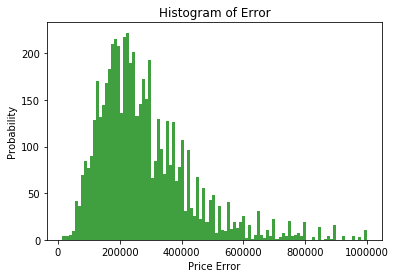

In [60]:
## Probability distributions of price
n, bins, patches = plt.hist(price, 100, facecolor='g', alpha=0.75)
plt.xlabel('Price Error')
plt.ylabel('Probability')
plt.title('Histogram of Error')
plt.show()

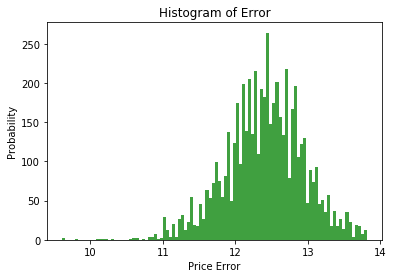

[425000. 130000. 149950. ... 230000. 268000. 225000.]


In [61]:
log_price = np.log(price)
n, bins, patches = plt.hist(log_price, 100, facecolor='g', alpha=0.75)
plt.xlabel('Price Error')
plt.ylabel('Probability')
plt.title('Histogram of Error')
plt.show()
print(np.exp(log_price))

## Get Trining Set and Data Set

In [62]:
##Building a dataset into 80% and 20%
def get_train_test(df):
    train = df.sample(frac=0.8, replace=False)
    return train

def get_X_Y(data):
    X = data[:,:-1]
    Y = data[:,-1]
    return (X,Y)

In [63]:
df_line_regression.head()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,property_type_Barn conversion,property_type_Block of flats,property_type_Bungalow,...,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class5,loc_class_class6,loc_class_class7,new_price
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,425000.0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,130000.0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,149950.0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,695000.0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,375000.0


## Linear Regression

In [64]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
data = np.array(df_line_regression)
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [66]:
model = LinearRegression()
model.fit(train_X , train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
hat_Y = model.predict(test_X)

In [68]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})

In [69]:
dataset.sort_values(by=['hat_Y'])

,hat_Y,test_Y
840,-1.808911e+19,330000.0
1009,-1.191947e+19,225000.0
1372,-1.191947e+19,395000.0
1,-1.191947e+19,450000.0
1297,-1.734053e+18,495000.0
1452,-1.545611e+18,359950.0
1069,3.772200e+04,89000.0
24,4.079400e+04,75000.0
368,5.436200e+04,100000.0
984,5.513000e+04,102000.0


In [70]:
dataset = dataset[dataset.hat_Y > 0]
dataset = dataset[dataset.hat_Y < 100000000]

In [71]:
hat_Y = np.array(dataset.hat_Y)
test_Y = np.array(dataset.test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.7516836392687004

## Linear Regression with Log_price

In [72]:
data = np.array(df_line_regression)
data[:, -1] = log_price

In [73]:
np.random.shuffle(data)
number_test = int(0.2 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [74]:
## init the model
model = LinearRegression()
model.fit(train_X , train_Y)

## predict
hat_Y = model.predict(test_X)

In [75]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(5)

,hat_Y,test_Y
419,12.561104,12.388394
360,11.651558,11.695247
213,13.067085,13.592367
66,11.608833,11.736069
471,12.352119,12.468437


In [76]:
dataset = dataset[dataset.hat_Y > 0]
dataset = dataset[dataset.hat_Y < 100000]

In [77]:
hat_Y = np.array(dataset.hat_Y)
test_Y = np.array(dataset.test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9839085075143469

In [78]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.7869911053950408

In [79]:
hat_Y

array([110254.02464543, 259275.0733665 , 123735.15859284, ...,
       167871.22617679, 205078.42913744, 199473.72555816])

(0.17662801070472792, 0.3514719000892061, 0.7172167707404103, 0.9464763603925067)


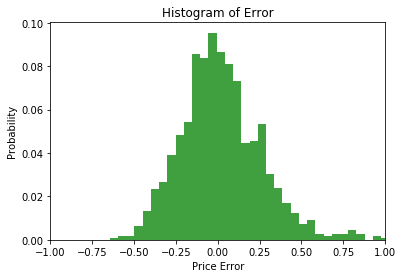

In [82]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

## Neural Networks

In [623]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = log_price
np.random.shuffle(data)
number_test = int(0.2 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [624]:
train_X.shape

(4506, 146)

In [625]:
train_Y.shape

(4506,)

In [626]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10), max_iter=1000, alpha=1e-5)
mlp.fit(train_X, train_Y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [627]:
test_X = X[:number_test]
test_Y = Y[:number_test]
hat_Y = mlp.predict(test_X)

In [628]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sort_values(by=['hat_Y']).sample(10)

,hat_Y,test_Y
895,12.262959,12.205823
307,11.565406,12.524526
42,12.359018,12.345835
724,13.144992,12.959844
54,12.595918,11.989129
1016,13.442181,12.736701
656,12.380415,12.577636
726,12.377757,12.427214
753,11.961250,11.918057
331,12.366452,13.017003


In [629]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9778596193485595

In [630]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.7194949881209015

In [631]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(10)

,hat_Y,test_Y
560,218418.065807,200000.0
413,148907.995625,170000.0
787,128094.274585,199950.0
1095,296697.733418,425000.0
182,80949.010046,125000.0
469,237007.296689,264950.0
26,323866.019671,250000.0
220,98547.517139,82500.0
1117,162915.535012,170000.0
543,199916.249437,299950.0


## Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=25, random_state=0,  n_estimators=100)

In [94]:
rf_regression = useful_information[['latitude','longitude','property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'new_home', 'price']]

In [95]:
df_line_regression

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,property_type_Barn conversion,property_type_Block of flats,property_type_Bungalow,...,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class5,loc_class_class6,loc_class_class7,new_price
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,425000.0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,130000.0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,149950.0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,695000.0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,375000.0
5,51.329060,-2.961752,0.0,2.0,0.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,135000.0
6,51.347470,-2.942667,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,164950.0
7,51.027775,-3.134305,2.0,3.0,0.0,1.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,269995.0
8,51.027775,-3.134305,2.0,4.0,0.0,2.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,319995.0


In [96]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = np.log(data[:,-1])
np.random.shuffle(data)
number_test = int(0.2 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [97]:
regr.fit(train_X, train_Y)
hat_Y = regr.predict(test_X)

In [98]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.984679160262558

In [99]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.8034962554339967

In [100]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(5)

,hat_Y,test_Y
94,402383.583224,465000.0
999,342692.060322,585000.0
1040,186083.981899,195500.0
971,204700.434923,95000.0
512,216474.954757,189950.0


(0.23179396092362345, 0.40408525754884544, 0.761101243339254, 0.9404973357015985)


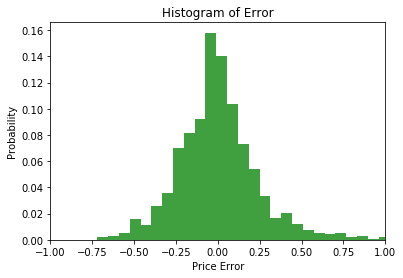

In [101]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

In [102]:
## save the model
joblib.dump(regr, "random_forest.m")

['random_forest.m']

## KNN Regressor

In [725]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = np.log(data[:,-1])
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [726]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(train_X, train_Y)
hat_Y = model.predict(test_X)

In [727]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9817315960884887

In [728]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.7572760285776083

(0.17519106407995297, 0.33098177542621987, 0.6748971193415638, 0.9094650205761317)


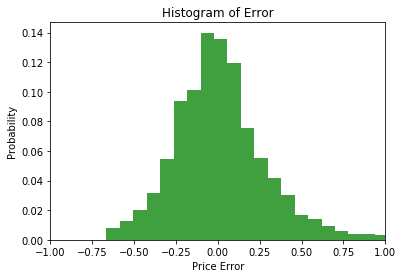

In [729]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

## Data Analysis

In [81]:
class selfAnalysis:
    
    def __init__(self, hat_Y, Y):
        self.hat_Y = hat_Y
        self.Y = Y
        self.errors = (self.hat_Y - self.Y)/self.Y
        
    def analysis(self):
        length = len(self.Y)
        percentage_in5 = []
        percentage_in10 = []
        percentage_in25 = []
        percentage_in50 = []
        for error in self.errors:
            if abs(error) <= 0.5:
                percentage_in50.append(error)
                if abs(error) <= 0.25:
                    percentage_in25.append(error)
                    if abs(error) <= 0.1:
                        percentage_in10.append(error)
                        if abs(error) <= 0.05:
                            percentage_in5.append(error)
        
        return (len(percentage_in5)/length, len(percentage_in10)/length, len(percentage_in25)/length, len(percentage_in50)/length)
    
    def display(self):
        weights = np.ones_like(self.errors)/float(len(self.errors))
        n, bins, patches = plt.hist(self.errors, 100, facecolor='g', alpha=0.75, weights=weights)
        plt.xlabel('Price Error')       
        plt.xlim(-1, 1)
        plt.ylabel('Probability')
        plt.title('Histogram of Error')
        plt.show()

## NLP

In [4]:
raw = pd.read_csv('raw.csv')

In [5]:
raw = raw[raw.description.notnull()]

In [6]:
text = list(raw.description)

In [7]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()  
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

raw['description'] = raw.description.apply(pre_process)

In [8]:
raw['description'][2]

'located in a central position well placed for the town centre sea front and other amenities an immaculately presented bedroom first floor flat converted from the former general hospital with electric heating double glazed sash windows and a parking space accommodation with approximate measurements entrance front door with security entry system to communal hall with internal staircase to first floor door to hall night storage heater entry phone airing cupboard lounge m x m x night storage heater tv point kitchen m x m x fitted with a range of wall and base units with roll edge worksurfaces over bowl single drainer sink unit fitted oven and ring hob with concealed extractor hood over integrated fridge freezer plumbing for a washing machine tiled splashback bedroom m x m x range of fitted wardrobes with over bed cupboards and dressing table tv point electric panel heater bedroom m x m x electric panel heater shower room double cubicle with triton shower unit vanity wash basin and low lev

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
 
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
    
#load a set of stop words
stopwords=get_stop_words("minimal-stop.txt")
 
#get the text column 
docs = raw['description'].tolist()
 
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [15]:
docs_test=raw['description'].tolist()
feature_names=cv.get_feature_names()
doc=docs_test[2]
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
 
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
 
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
keywords

{'stephen': 0.255,
 'heater': 0.247,
 'co': 0.176,
 'client': 0.162,
 'information': 0.155,
 'ltd': 0.148,
 'anti': 0.147,
 'data': 0.146,
 'cnb': 0.139,
 'night': 0.135}

In [13]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""

    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:

        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [855]:
df_linear = pd.read_csv('line.csv')

In [856]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Data columns (total 13 columns):
index            5683 non-null int64
latitude         5683 non-null float64
longitude        5683 non-null float64
property_type    5683 non-null object
num_bathrooms    5683 non-null float64
num_bedrooms     5683 non-null float64
num_floors       5683 non-null float64
num_recepts      5683 non-null float64
outcode          5683 non-null object
post_town        5683 non-null object
new_home         5683 non-null float64
loc_class        5683 non-null object
price            5683 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 577.3+ KB
